In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import squarify   # pip install squarify (algorithm for treemap)
import random
import pandas as pd 
import numpy as np 

dir_BCR_01H = '../Data/BulkBCRseq/1차년도/BCR_HC_CDR3/'
dir_BCR_01L = '../Data/BulkBCRseq/1차년도/BCR_LC_CDR3/'
dir_BCR_02H = '../Data/BulkBCRseq/2차년도/BCR_HC_CDR3/'
dir_BCR_02L = '../Data/BulkBCRseq/2차년도/BCR_LC_CDR3/'
dir_TCR_001 = '../Data/BulkTCRseq/1차년도/'
dir_TCR_002 = '../Data/BulkTCRseq/2차년도/'

sample = pd.read_csv( dir_BCR_01H + "COV-CCO-0411_IGG_mig_cdr3_clones_result.csv")
sample02 = pd.read_csv( dir_BCR_01H + "COV-CCO-0411_IGM_mig_cdr3_clones_result.csv")
sample03 = pd.read_csv( dir_BCR_01H + "COV-CCO-0413_IGG_mig_cdr3_clones_result.csv")
sample04 = pd.read_csv( dir_BCR_01H + "COV-CCO-0413_IGM_mig_cdr3_clones_result.csv")

In [3]:
sample

,Read Count,Fraction,Clonal Sequence,Clonal Sequence Quality,CDR3 Min Quality,CDR3 Sequence,CDR3 Amino Acid Sequence,Clonal Type,Frame Shift,Stop Codon,Amino Acid Length,V segment,all V hits,D segment,all D hits,J segment,all J hits,C segment,all C hits
0,309,0.015976,TGTGTGAGACATACGACGCCCGGGAATAGAGGTGGCTGGGCCTACG...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,40,TGTGTGAGACATACGACGCCCGGGAATAGAGGTGGCTGGGCCTACG...,CVRHTTPGNRGGWAYGMDVW,IGG,NaN,NaN,20,IGHV4-39,IGHV4-39,IGHD6-19,IGHD6-19,IGHJ6,IGHJ6,IGHG1,IGHG1;IGHG2;IGHGP
1,273,0.014114,TGTGCAACGGTCTTTGAGTTCTGG,IIIIIIIIIIIIIIIIIIIIIIII,40,TGTGCAACGGTCTTTGAGTTCTGG,CATVFEFW,IGG,NaN,NaN,8,IGHV3-74,IGHV3-74,NaN,NaN,IGHJ4,IGHJ4;IGHJ5,IGHG1,IGHG1;IGHG2;IGHGP
2,149,0.007703,TGTGCGAGAGATCCGACTAATGTTAATTGGGGCTGG,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,40,TGTGCGAGAGATCCGACTAATGTTAATTGGGGCTGG,CARDPTNVNWGW,IGG,NaN,NaN,12,IGHV3-53,IGHV3-53;IGHV3-66,IGHD2-8,IGHD2-8;IGHD7-27;IGHD3-16,IGHJ4,IGHJ4;IGHJ5,IGHG1,IGHG1;IGHG2;IGHGP
3,139,0.007186,TGTGCAAGAGGCCGACATGTTAGTGGTTATTCCAATACGTGGTTCG...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,40,TGTGCAAGAGGCCGACATGTTAGTGGTTATTCCAATACGTGGTTCG...,CARGRHVSGYSNTWFENW,IGG,NaN,NaN,18,IGHV3-13,IGHV3-13,IGHD3-22,IGHD3-22;IGHD3-3,IGHJ5,IGHJ5;IGHJ4,IGHG1,IGHG1;IGHGP;IGHG2
4,134,0.006928,TGTGCAAGAGCCCGCCATTTTACTGGTCTCCGGAACACTCACTTTG...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,40,TGTGCAAGAGCCCGCCATTTTACTGGTCTCCGGAACACTCACTTTG...,CARARHFTGLRNTHFDQW,IGG,NaN,NaN,18,IGHV3-13,IGHV3-13,IGHD3-9,IGHD3-9,IGHJ4,IGHJ4;IGHJ5,IGHG1,IGHG1;IGHG2;IGHGP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,1,0.000052,TGTGTGCGAACCGGCCACTGG,IIIIIIIIIIIIIIIIIIIII,40,TGTGTGCGAACCGGCCACTGG,CVRTGHW,IGG,NaN,NaN,7,IGHV3-66,IGHV3-66;IGHV3-53;IGHV3-20,IGHD1-14,IGHD1-14;IGHD3-10,IGHJ4,IGHJ4;IGHJ5;IGHJ1,IGHG1,IGHG1;IGHG2;IGHGP
2494,1,0.000052,TGTGCGAGCCTTGCCTACTGG,IIIIIIIIIIIIIIIIIIIII,40,TGTGCGAGCCTTGCCTACTGG,CASLAYW,IGG,NaN,NaN,7,IGHV3-7,IGHV3-7,NaN,NaN,IGHJ4,IGHJ4;IGHJ5;IGHJ1,IGHG1,IGHG1;IGHG2;IGHGP
2495,1,0.000052,TGTGGAGGAGGACCGTGGTGG,IIIIIIIIIIIIIIIIIIIII,40,TGTGGAGGAGGACCGTGGTGG,CGGGPWW,IGG,NaN,NaN,7,IGHV3-74,IGHV3-74,IGHD4-17,IGHD4-17;IGHD5-12;IGHD5-18,IGHJ4,IGHJ4;IGHJ5;IGHJ1,IGHG1,IGHG1;IGHG2;IGHGP
2496,1,0.000052,TGTGCGATGGACGTCTGG,IIIIIIIIIIIIIIIIII,40,TGTGCGATGGACGTCTGG,CAMDVW,IGG,NaN,NaN,6,IGHV3-66,IGHV3-66;IGHV3-53,NaN,NaN,IGHJ6,IGHJ6,IGHG1,IGHG1;IGHG2;IGHGP


In [5]:
len(sample)

2498

<AxesSubplot:>

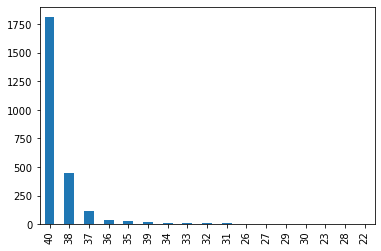

In [3]:
sample['CDR3 Min Quality'].value_counts().plot(kind='bar')

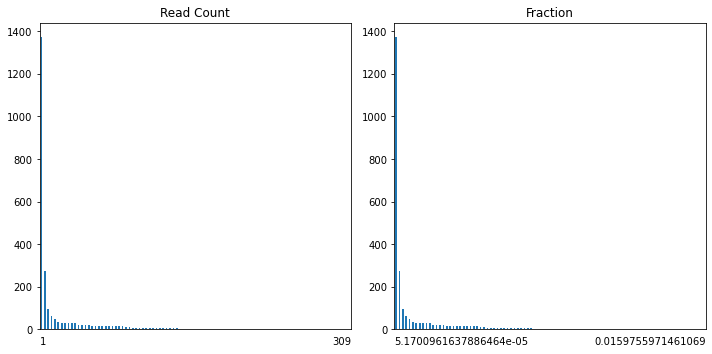

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

first = sample['Read Count'].value_counts()
first.plot(kind='bar', ax=axes[0])
axes[0].set_xticks([])
axes[0].text(0, -0.05, f"{min(sample['Read Count'])}", transform=axes[0].transAxes, ha='left', fontsize=10)
axes[0].text(1, -0.05, f"{max(sample['Read Count'])}", transform=axes[0].transAxes, ha='right', fontsize=10)
axes[0].set_title('Read Count')

second = sample['Fraction'].value_counts()
second.plot(kind='bar', ax=axes[1])
axes[1].set_xticks([])
axes[1].text(0, -0.05, f"{min(sample['Fraction'])}", transform=axes[1].transAxes, ha='left', fontsize=10)
axes[1].text(1, -0.05, f"{max(sample['Fraction'])}", transform=axes[1].transAxes, ha='right', fontsize=10)
axes[1].set_title('Fraction')

plt.tight_layout()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


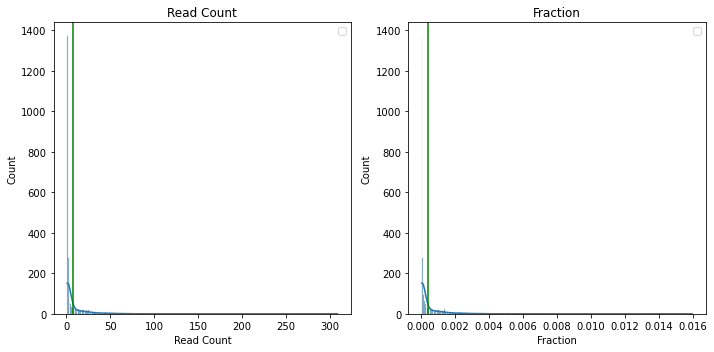

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(sample['Read Count'], kde=True, ax=axes[0])
# axes[0].axvline(sample['Read Count'].min(), color='r', linestyle='--')
# axes[0].axvline(sample['Read Count'].max(), color='r', linestyle='--')
axes[0].axvline(sample['Read Count'].mean(), color='g', linestyle='-')
axes[0].legend()
axes[0].set_title('Read Count')

sns.histplot(sample['Fraction'], kde=True, ax=axes[1])
# axes[1].axvline(sample['Fraction'].min(), color='r', linestyle='--')
# axes[1].axvline(sample['Fraction'].max(), color='r', linestyle='--')
axes[1].axvline(sample['Fraction'].mean(), color='g', linestyle='-')
axes[1].legend()
axes[1].set_title('Fraction')

plt.tight_layout()
plt.show()


c:\Users\Hyeonjung\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Hyeonjung\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


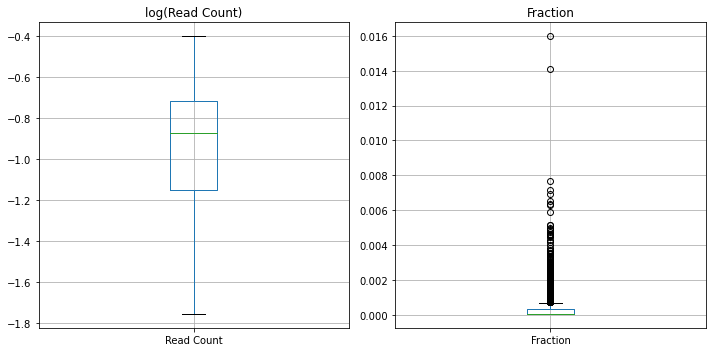

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sample['Read Count'] = np.log10(sample['Read Count'])

sample.boxplot(column=['Read Count'], ax=axes[0])
axes[0].set_title('log(Read Count)')

sample.boxplot(column=['Fraction'], ax=axes[1])
axes[1].set_title('Fraction')

plt.tight_layout()
plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.


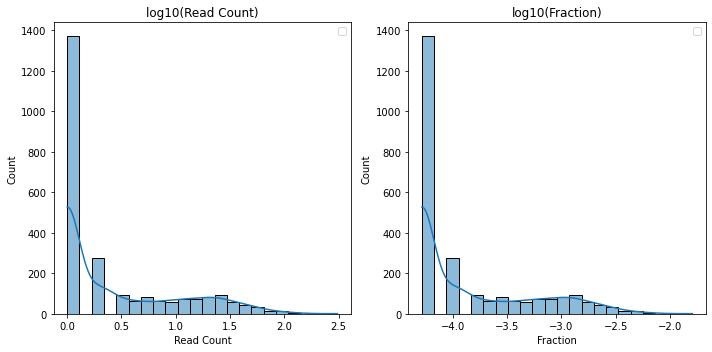

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(np.log10(sample['Read Count']), kde=True, ax=axes[0])
axes[0].legend()
axes[0].set_title('log10(Read Count)')

sns.histplot(np.log10(sample['Fraction']), kde=True, ax=axes[1])
axes[1].legend()
axes[1].set_title('log10(Fraction)')

plt.tight_layout()
plt.show()


In [8]:
max(sample['Read Count']),min(sample['Read Count']), np.mean(sample['Read Count'])

(309, 1, 7.742994395516413)

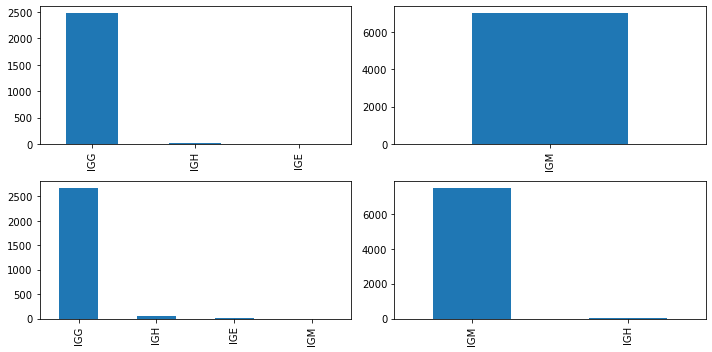

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5)) 
sample['Clonal Type'].value_counts().plot(kind='bar', ax=axes[0,0])
sample02['Clonal Type'].value_counts().plot(kind='bar', ax=axes[0,1])
sample03['Clonal Type'].value_counts().plot(kind='bar', ax=axes[1,0])
sample04['Clonal Type'].value_counts().plot(kind='bar', ax=axes[1,1])

plt.tight_layout()
plt.show()


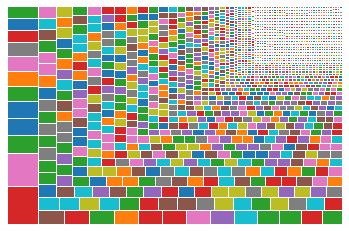

In [10]:
sample = pd.DataFrame(sample)
selected = ['CDR3 Amino Acid Sequence', 'Fraction', 'Clonal Type']
df01 = sample[selected]
df01 = pd.DataFrame(df01)
colors = {'IGG':'red', 'IGH':'blue', 'IGE':'green'}
# df01['color'] = df01['Clonal Type'].map(colors)
df01['color'] = [plt.cm.tab10(random.random()) for _ in range(len(df01))]
squarify.plot(sizes=df01['Fraction'], label=[], color=df01['color'],edgecolor='white')
plt.axis('off')
plt.show()

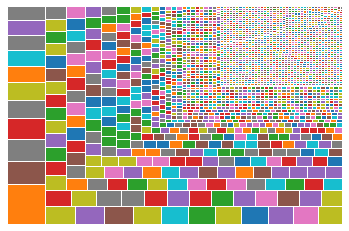

In [12]:
sample03 = pd.DataFrame(sample03)
selected = ['CDR3 Amino Acid Sequence', 'Fraction', 'Clonal Type']
df03 = sample03[selected]
df03 = pd.DataFrame(df03)
df03['color'] = [plt.cm.tab10(random.random()) for _ in range(len(df03))]
squarify.plot(sizes=df03['Fraction'], label=[], color=df03['color'],edgecolor='white')
plt.axis('off')
plt.show()